<a href="https://colab.research.google.com/github/imsmahi/Machine_Learning1_IA1_2324/blob/main/test_tp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1**

Générer un jeu de données aléatoire avec 10 exemples et créer un DataFrame avec les données générées. (**1 pt**)

In [1]:
import numpy as np
import pandas as pd

# Nombre d'exemples à générer
n_samples = 10

# Définir les caractéristiques et les classes
features = ['pelage', 'carnivore', 'domestique','griffes']
classes = ['chien', 'chat', 'autre']

# Générer un jeu de données aléatoire avec n_samples exemples
np.random.seed(42)  # Pour la reproductibilité des résultats
random_data = np.random.randint(2, size=(n_samples, len(features)))

# Créer un DataFrame avec les données générées
df = pd.DataFrame(random_data, columns=features)

# Ajouter une colonne pour la classe (étiquette)
df['classe'] = np.random.choice(classes, size=n_samples)

df

,pelage,carnivore,domestique,griffes,classe
0,0,1,0,0,autre
1,0,1,0,0,autre
2,0,1,0,0,chat
3,0,0,1,0,autre
4,1,1,1,0,chat
5,1,0,1,1,chat
6,1,1,1,1,autre
7,1,1,0,0,chat
8,1,1,1,0,autre
9,1,0,0,0,autre


# **Question 2**

Charger le fichier `test.csv` dans un autre DataFrame. (**0.5 pt**)

In [2]:
data = pd.read_csv('test_tp.csv')

data

,pelage,carnivore,domestique,griffes,classe
0,0,1,0,0,autre
1,0,1,0,0,chat
2,0,1,0,0,autre
3,0,0,1,0,autre
4,1,1,1,0,chien
...,...,...,...,...,...
495,0,1,1,0,chien
496,1,1,1,1,autre
497,0,0,1,0,chien
498,0,0,0,0,chat


# **Question 3**

Implémenter une function qui afficher les `n` premiers exemples apres l'exemple n° `i`. (**0.5 pt**)

In [4]:
def affiche(n,i):
  subset = data.iloc[i+1:n+2]
  return subset

n = 5
i = 1

affiche(n,i)

,pelage,carnivore,domestique,griffes,classe
2,0,1,0,0,autre
3,0,0,1,0,autre
4,1,1,1,0,chien
5,1,0,1,1,chien
6,1,1,1,1,autre


# **Question 4**

Calculer la distribution des espèces. (**0.5 pt**)

In [6]:
distribution_especes = data['classe'].value_counts()

print(distribution_especes)

chien    179
chat     171
autre    150
Name: classe, dtype: int64


# **Question 5**
Utilisez des visualisations telles que des histogrammes ou des diagrammes à barres pour illustrer la répartition des espèces. (**1.5 pts**)

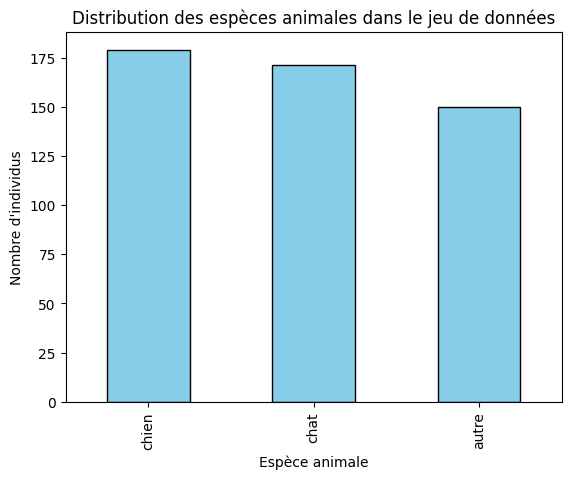

In [7]:
import matplotlib.pyplot as plt

# Créer un graphique à barres
distribution_especes.plot(kind='bar', color='skyblue', edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Espèce animale')
plt.ylabel('Nombre d\'individus')
plt.title('Distribution des espèces animales dans le jeu de données')

# Afficher le graphique
plt.show()

# **Question 6**

Que représente la figure affichée par le code suivant! Commenter chaque ligne. (N'oublier pas d'importer le package nécessaire) (**2 pts**)

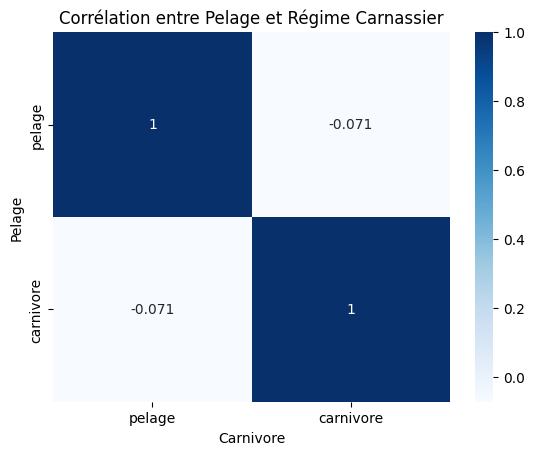

In [8]:
import seaborn as sns

# Calculer la matrice de corrélation
res = data[['pelage', 'carnivore']].corr()

# Utiliser Seaborn pour visualiser la corrélation
sns.heatmap(res, annot=True, cmap='Blues')

# Ajouter des labels et un titre
plt.xlabel('Carnivore')
plt.ylabel('Pelage')
plt.title('Corrélation entre Pelage et Régime Carnassier')

# Afficher le graphique
plt.show()

# **Question 7**

Diviser les données en ensembles d'entraînement (80\%) et de test (20\%). (**0.5 pt**)

In [9]:
from sklearn.model_selection import train_test_split

X = data[['pelage', 'carnivore', 'domestique', 'griffes']].values
y = data['classe'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Question 8**

Implementer une fonction qui a comme argument une classe `c` (*chien*, *chat* ou *autre*), et qui retourne:


1.   La probabilité a priori pour la classe `c`. (**1 pt**)
2.   La probabilité conditionnelle pour chaque caractéristique de cette classe. (**1 pt**)

In [10]:
def prior_prob(c,X,y):

  # Sélectionner les exemples de la classe c
  X_c = X[y == c]

  # Calculer les probabilités a priori pour la classe c
  p_prob = len(X_c) / len(X)

  # Calculer les probabilités conditionnelles pour chaque caractéristique
  c_probs = (X_c.sum(axis=0)) / (len(X_c))

  return p_prob, c_probs

for c in classes:
  p_prob, c_probs = prior_prob(c,X_train, y_train)
  print(c,':',p_prob)
  print(c_probs)

chien : 0.3625
[0.48275862 0.51034483 0.48275862 0.51724138]
chat : 0.3375
[0.47407407 0.47407407 0.48888889 0.41481481]
autre : 0.3
[0.5        0.575      0.55833333 0.5       ]


# **Question 9**
Calculer la probabilité a posteriori en utilisant le théorème de Bayes. (**1 pt**)

In [12]:
def posterior_prob(example, p_prob, c_probs):

  # Calculer la probabilité a posteriori en utilisant le théorème de Bayes
  posteriori = p_prob * np.prod(example * c_probs + (1-example) * (1-c_probs))

  # NB: le facteur (1-example) * (1-c_probs) a été ajouté à la formule
  # afin d'ajuster la contribution de la caractéristique 'c​' en fonction de
  # sa présence ou de son absence dans l'échantillon observé (example).

  return posteriori


example = np.array([1,1,1,1])


for c in classes:
  p_prob, c_probs = prior_prob(c, X_train, y_train)

  p = posterior_prob(example, p_prob, c_probs)

  print('probabilté a posteriori pour',c,'est:',p)

probabilté a posteriori pour chien est: 0.022301037352905
probabilté a posteriori pour chat est: 0.015382630696540164
probabilté a posteriori pour autre est: 0.024078125


# **Question 10**

Prédire les classes sur l'ensemble de test (Implémenter la fonction `predict`). (**2.5 pts**)

In [13]:
def predict(X, prior_probs, conditional_probs):
  predictions = []

  for example in X:

    posterior_probs = {}

    for c in classes:
      # Récupérer la probabilité a priori pour la classe c
      prior_prob_c = prior_probs[c]

      # Récupérer la probabilité conditionnelle pour chaque caractéristique
      conditional_prob_c = conditional_probs[c]

      # Calculer la probabilité a posteriori en utilisant le théorème de Bayes
      posterior_prob_c = posterior_prob(example, prior_prob_c, conditional_prob_c)

      posterior_probs[c] = posterior_prob_c

    # Prédire la classe avec la probabilité a posteriori maximale
    predicted_class = max(posterior_probs, key=posterior_probs.get)

    predictions.append(predicted_class)

  predictions = np.asarray(predictions)

  return predictions

# **Question 11**

Calculer la précision du modèle. (**1 pt**)

In [16]:
prior_probs = {}
conditional_probs = {}

# Apprentissage du modèle (Calcul des probabilités)
for c in classes:
  prior_probs[c], conditional_probs[c] = prior_prob(c,X_train, y_train)

# Prédire les classes sur l'ensemble de test
y_pred = predict(X_test, prior_probs, conditional_probs)

# Calculer la précision du modèle
accuracy = np.mean(y_pred == y_test)

accuracy

0.31

# **Question 12**

 Afficher un graphique de barres montrant le pourcentage de prédictions correctes pour chaque classe. (**2 pt**)

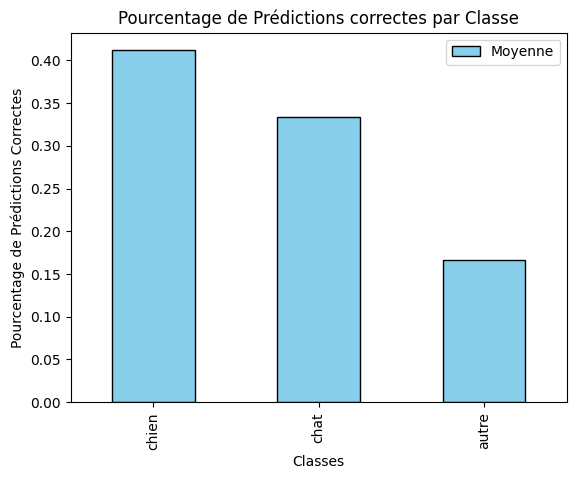

In [17]:
import matplotlib.pyplot as plt

correct_predictions_by_class = {}

for c in classes:
  # Calculer le pourcentage de prédictions correctes par classe
  correct_predictions_by_class[c] = np.mean(y_pred[y_test == c] == c)

# Conversion à un dataframe
correct_predictions_by_class = pd.DataFrame.from_dict(correct_predictions_by_class,
                                                      orient='index', columns=['Moyenne'])

# Afficher un graphique de barres
correct_predictions_by_class.plot(kind='bar', color='skyblue', edgecolor='black')

# Ajouter des labels et un titre
plt.title('Pourcentage de Prédictions correctes par Classe')
plt.xlabel('Classes')
plt.ylabel('Pourcentage de Prédictions Correctes')

# Afficher le graphique
plt.show()